In [ ]:
import pandas as pd

In [ ]:
abalone = pd.read_csv('abalone.csv')

**แถว 0**

In [ ]:
abalone = abalone.drop('Unnamed: 0', axis=1)

In [ ]:
abalone.head(10)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [ ]:
abalone.shape

(4177, 9)

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucke weight', 'Viscera weight', 'Shell weight', 'Rings']

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucke weight   4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB



```
sex -> object
length -> float
diameter -> float
height -> float
whole weight -> float
shuckle weight -> float
viscera weight -> float
shell weight -> float
rings -> -> int
```

In [ ]:
dict1 = {'M': 'Male', 'F': 'Female'}
abalone['Sex'] = abalone['Sex'].replace(dict1).astype('category')

abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucke weight   4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [ ]:
abalone['Sex'].value_counts()

,count
Sex,
Male,1528
I,1342
Female,1307


In [ ]:
# Question 2
dict2 = {'I': 'Infant'}
abalone['Sex'] = abalone['Sex'].replace(dict2).astype('category')

abalone['Sex'].value_counts()

,count
Sex,
Male,1528
Infant,1342
Female,1307


In [ ]:
abalone['Rings'].value_counts().count()

28

In [ ]:
abalone['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [ ]:
unique_counts = pd.DataFrame.from_records([(col, abalone[col].nunique()) for col in abalone.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [ ]:
unique_counts

,Column_Name,Num_Unique
0,Sex,3
8,Rings,28
3,Height,51
2,Diameter,111
1,Length,134
6,Viscera weight,880
7,Shell weight,926
5,Shucke weight,1515
4,Whole weight,2429


In [ ]:
type(unique_counts)

pandas.core.frame.DataFrame

In [ ]:
abalone['BinningRings'] = pd.cut(abalone['Rings'], bins=3)

In [ ]:
abalone['BinningRings']

,BinningRings
0,"(10.333, 19.667]"
1,"(0.972, 10.333]"
2,"(0.972, 10.333]"
3,"(0.972, 10.333]"
4,"(0.972, 10.333]"
...,...
4172,"(10.333, 19.667]"
4173,"(0.972, 10.333]"
4174,"(0.972, 10.333]"
4175,"(0.972, 10.333]"


In [ ]:
abalone.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucke weight,Viscera weight,Shell weight,Rings,BinningRings
0,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,"(10.333, 19.667]"
1,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,"(0.972, 10.333]"
2,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,"(0.972, 10.333]"


In [ ]:
abalone['BinningRings_1'] = pd.cut(abalone['Rings'], bins=3, labels=['new', 'medium', 'old'])

In [ ]:
abalone.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucke weight,Viscera weight,Shell weight,Rings,BinningRings,BinningRings_1
0,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,"(10.333, 19.667]",medium
1,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,"(0.972, 10.333]",new
2,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,"(0.972, 10.333]",new


In [ ]:
abalone['BinningRings_1'].unique()

['medium', 'new', 'old']
Categories (3, object): ['new' < 'medium' < 'old']

In [ ]:
abalone['BinningRings_1'].value_counts()

,count
BinningRings_1,
new,2730
medium,1385
old,62


In [ ]:
import matplotlib.pyplot as plt

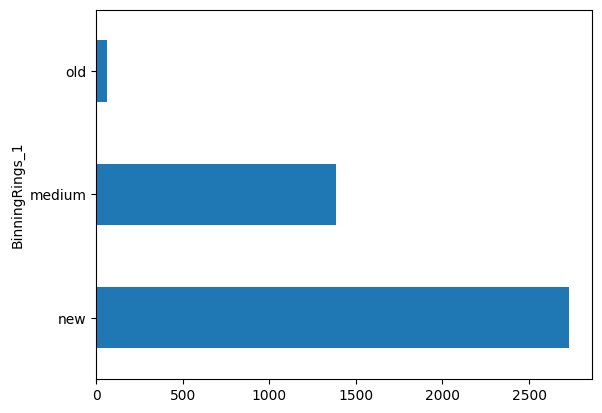

In [ ]:
abalone['BinningRings_1'].value_counts().plot(kind='barh')
plt.show()

In [ ]:
# Question 3
abalone['BinningHeight'] = pd.cut(abalone['Height'], bins=6, labels=['very low', 'low', 'medium', 'moderate', 'high', 'very high'])
abalone['BinningHeight'].value_counts()

,count
BinningHeight,
very low,3774
low,401
medium,1
very high,1
moderate,0
high,0


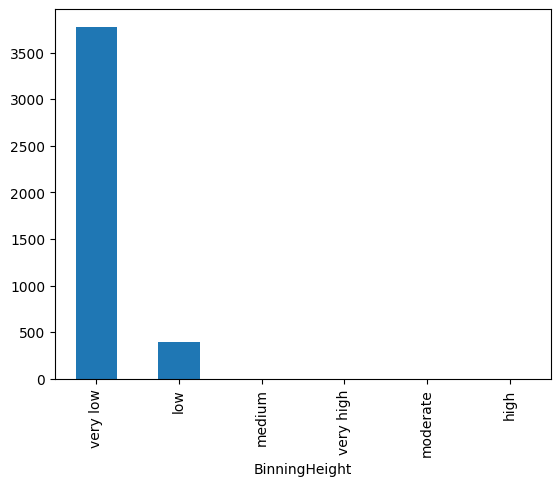

In [ ]:
abalone['BinningHeight'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
abalone['BinningRings_Qcut'] = pd.qcut(abalone.Rings, q=5, labels=['lastest', 'newer', 'medium', 'not so old', 'oldest'])

In [ ]:
abalone.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucke weight,Viscera weight,Shell weight,Rings,BinningRings,BinningRings_1,BinningHeight,BinningRings_Qcut
0,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,"(10.333, 19.667]",medium,very low,oldest
1,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,"(0.972, 10.333]",new,very low,lastest
2,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,"(0.972, 10.333]",new,very low,newer


In [ ]:
abalone['BinningRings_Qcut'].unique()

['oldest', 'lastest', 'newer', 'medium', 'not so old']
Categories (5, object): ['lastest' < 'newer' < 'medium' < 'not so old' < 'oldest']

In [ ]:
abalone['BinningRings_Qcut'].value_counts()

,count
BinningRings_Qcut,
newer,1257
lastest,839
not so old,754
oldest,693
medium,634


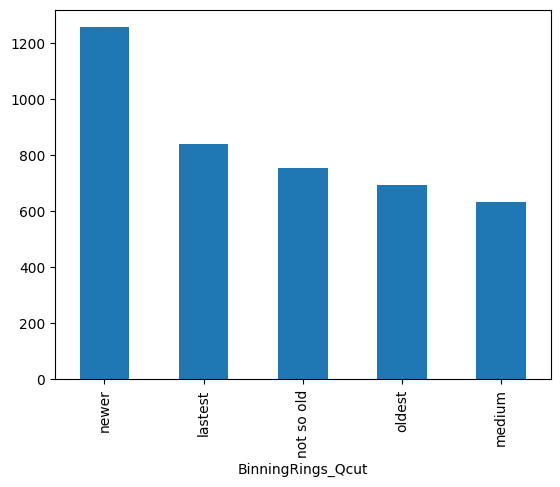

In [ ]:
abalone['BinningRings_Qcut'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Question 4
abalone['BinningHeight_Qcut'] = pd.qcut(abalone.Height, q=3, labels=['low', 'moderate', 'high'])
abalone['BinningHeight_Qcut']

,BinningHeight_Qcut
0,low
1,low
2,moderate
3,low
4,low
...,...
4172,high
4173,moderate
4174,high
4175,moderate


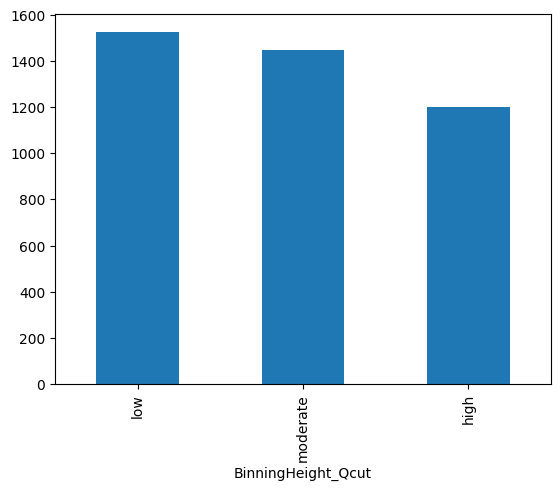

In [ ]:
abalone['BinningHeight_Qcut'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
pd.crosstab(abalone.Sex, abalone.Rings)

Rings,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
Sex,,,,,,,,,,,,,,,,,,,,,
Female,0,0,0,0,4,16,44,122,238,248,...,15,12,7,3,6,1,1,0,1,1
Infant,1,1,12,51,100,216,267,274,173,92,...,2,2,1,0,0,0,0,0,0,0
Male,0,0,3,6,11,27,80,172,278,294,...,15,12,6,3,3,1,0,1,1,0


In [ ]:
pd.crosstab(abalone.Sex, abalone.Rings, margins=True)

Rings,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,29,All
Sex,,,,,,,,,,,,,,,,,,,,,
Female,0,0,0,0,4,16,44,122,238,248,...,12,7,3,6,1,1,0,1,1,1307
Infant,1,1,12,51,100,216,267,274,173,92,...,2,1,0,0,0,0,0,0,0,1342
Male,0,0,3,6,11,27,80,172,278,294,...,12,6,3,3,1,0,1,1,0,1528
All,1,1,15,57,115,259,391,568,689,634,...,26,14,6,9,2,1,1,2,1,4177


In [ ]:
abalone['Height'].mean()

0.13951639932966242

In [ ]:
abalone['Height'].quantile(q=[0.25, 0.5, 0.75])

,Height
0.25,0.115
0.50,0.140
0.75,0.165


In [ ]:
abalone['Height'].max()-abalone['Height'].min()

1.13

In [ ]:
abalone['Height'].var()

0.0017495026644267044

In [ ]:
round(abalone['Height'].var(), 6)

0.00175

In [ ]:
abalone['Height'].std()

0.041827056607257274

In [ ]:
round(abalone['Height'].std(), 6)

0.041827

In [ ]:
abalone.to_csv("abaloneOutput.csv")